# Abalone Case Study

## Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

## Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

## Name / Data Type / Measurement Unit / Description

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("setup complete")

setup complete


### Loading Dataset

In [2]:
df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#checking shape of the dataset
df.shape

(4177, 9)

In [4]:
#checking the data types
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
#checking info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
#statistical summary
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


The above Dataframe shows the statistical summary of the dataset 

In [7]:
# correlation matrix
correlation = df.corr()
correlation

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


The above matrix shows the corelation between variables magnitude close to 1.00 has hisghest corelation

In [8]:
#checking missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No missing values found

### Visualisation And Analysis

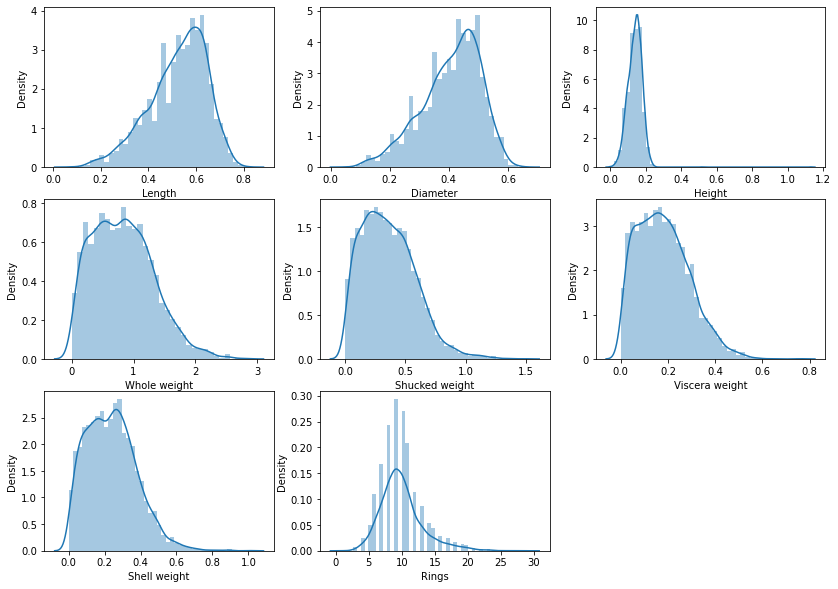

In [9]:
cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
plot = 1
plt.figure(figsize=(14,10))
for i in cols:
    plt.subplot(3,3,plot)
    sns.distplot(df[i])
    plot=plot+1
plt.show()

None of the column is normally distributed all of them have a little bit skewness

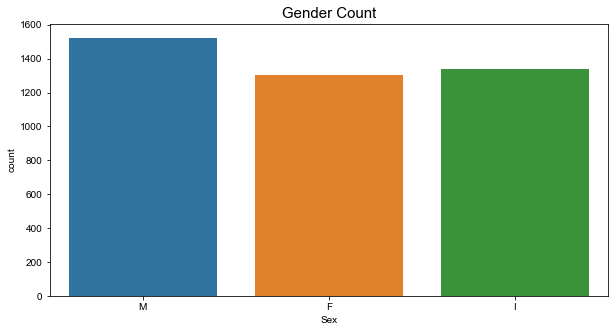

In [10]:
plt.figure(figsize=(10,5))
plt.title('Gender Count',fontsize=15)
sns.set_style("darkgrid")
sns.countplot(df.Sex)
plt.show()

The above plot shows the distribution of gender in dataset

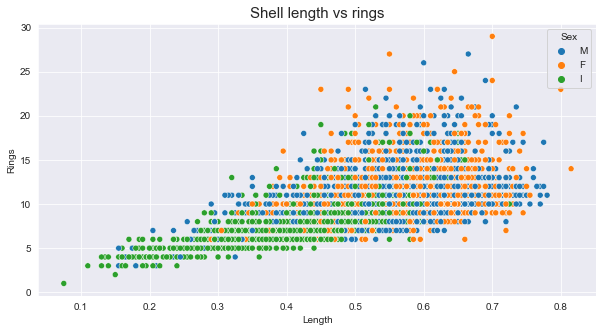

In [11]:
plt.figure(figsize=(10,5))
plt.title('Shell length vs rings',fontsize=15)
sns.scatterplot(df.Length, df.Rings, hue=df.Sex)
plt.show()

The relation seems to be little bit linear.Age increase shell length increases.

There are ouliers present in shell weight feature.

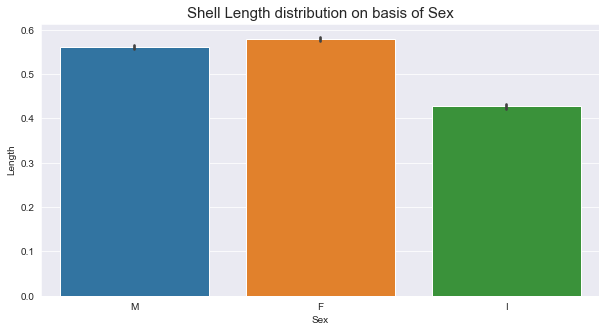

In [12]:
plt.figure(figsize=(10,5))
plt.title('Shell Length distribution on basis of Sex',fontsize=15)
sns.barplot(df.Sex,df.Length)
plt.show()

Females abalones have slightly larger shell length than males

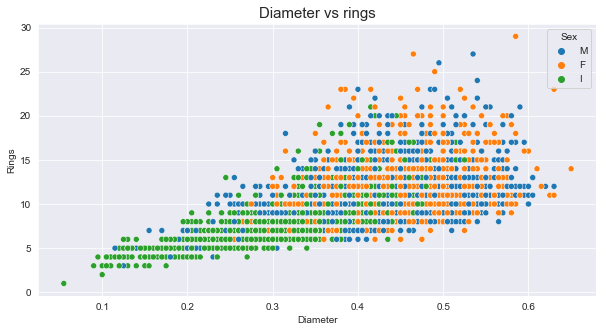

In [13]:
plt.figure(figsize=(10,5))
plt.title('Diameter vs rings',fontsize=15)
sns.scatterplot(df.Diameter, df.Rings, hue=df.Sex)
plt.show()

As the age increases diameter of abalone also increases

There is a little bit of linearity in the variabes

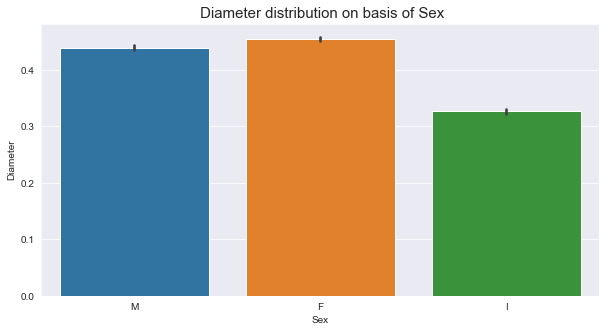

In [14]:
plt.figure(figsize=(10,5))
plt.title(' Diameter distribution on basis of Sex',fontsize=15)
sns.barplot(df.Sex,df.Diameter)
plt.show()

Females abalones have slightly more diameter than male abalones

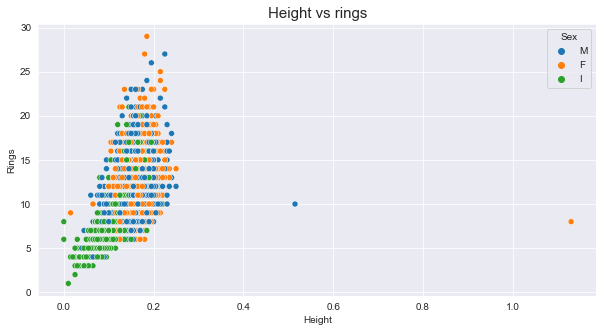

In [15]:
plt.figure(figsize=(10,5))
plt.title('Height vs rings',fontsize=15)
sns.scatterplot(df.Height, df.Rings, hue=df.Sex)
plt.show()

With increase in age the height of the abalones increases

There are outliers in height variable

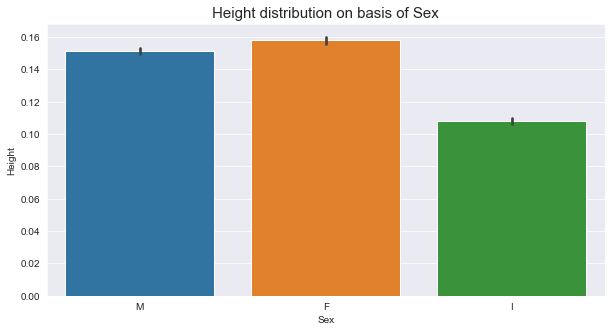

In [16]:
plt.figure(figsize=(10,5))
plt.title('Height distribution on basis of Sex',fontsize=15)
sns.barplot(df.Sex,df.Height)
plt.show()

Female abalones are taller than males.

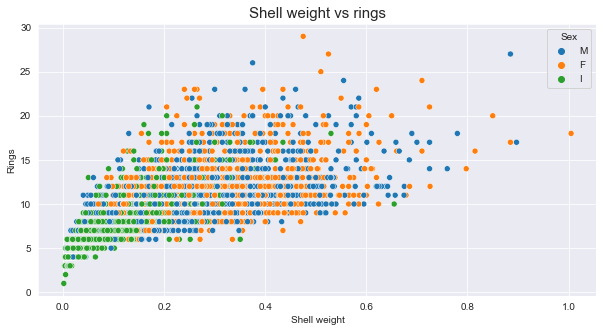

In [17]:
plt.figure(figsize=(10,5))
plt.title('Shell weight vs rings',fontsize=15)
sns.scatterplot(df['Shell weight'], df.Rings, hue=df.Sex)
plt.show()

As age increases shell weight increases

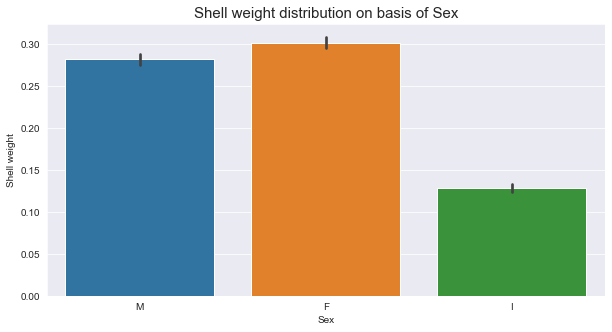

In [18]:
plt.figure(figsize=(10,5))
plt.title('Shell weight distribution on basis of Sex',fontsize=15)
sns.barplot(df.Sex,df['Shell weight'])
plt.show()

Shell weights of abalones are higher for females rather than males

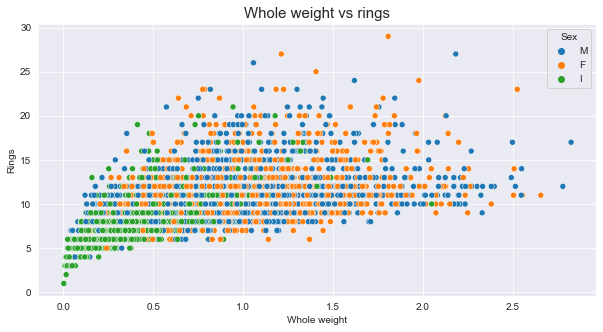

In [19]:
plt.figure(figsize=(10,5))
plt.title('Whole weight vs rings',fontsize=15)
sns.scatterplot(df['Whole weight'], df.Rings, hue=df.Sex)
plt.show()

The weight of abalone increases with increase in age although this not always true since the relation is not linear

There is lot of overlaaping of the datapoints

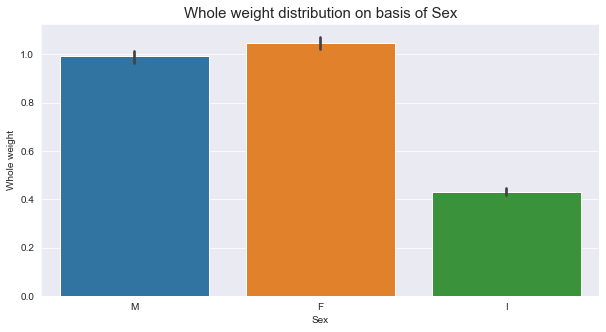

In [20]:
plt.figure(figsize=(10,5))
plt.title('Whole weight distribution on basis of Sex',fontsize=15)
sns.barplot(df.Sex,df['Whole weight'])
plt.show()

Female have higher weight than male abalones

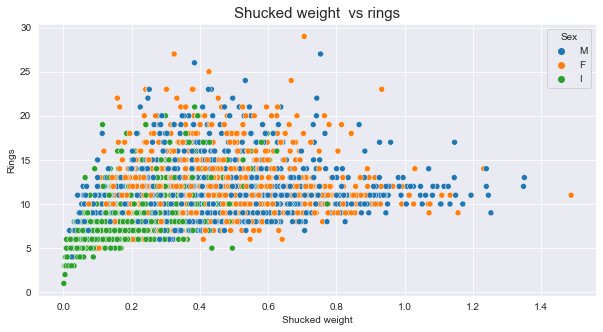

In [21]:
plt.figure(figsize=(10,5))
plt.title('Shucked weight  vs rings',fontsize=15)
sns.scatterplot(df['Shucked weight'], df.Rings, hue=df.Sex)
plt.show()

As shucked weight increases age of abalone age increases

There is not a linear relation between independent and dependent variables

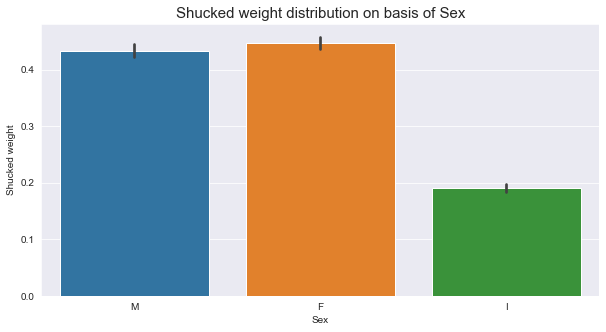

In [22]:
plt.figure(figsize=(10,5))
plt.title('Shucked weight distribution on basis of Sex',fontsize=15)
sns.barplot(df.Sex,df['Shucked weight'])
plt.show()

Females have higher shucked weight than males

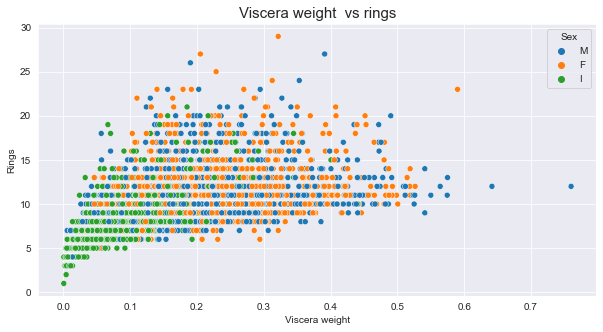

In [23]:
plt.figure(figsize=(10,5))
plt.title('Viscera weight  vs rings',fontsize=15)
sns.scatterplot(df['Viscera weight'], df.Rings, hue=df.Sex)
plt.show()

There's alot of overlapping of data points

As the viscera height increases age of the abalone increases

Also there are some outliers in viscera weight 

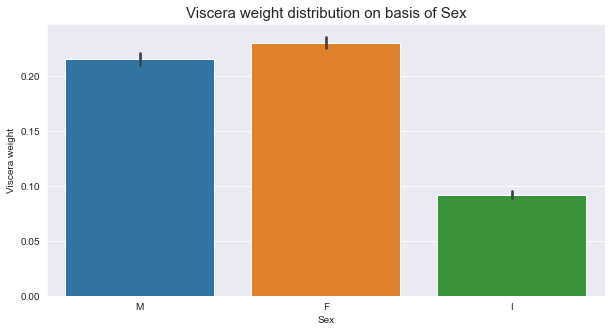

In [24]:
plt.figure(figsize=(10,5))
plt.title('Viscera weight distribution on basis of Sex',fontsize=15)
sns.barplot(df.Sex,df['Viscera weight'])
plt.show()

Female abalones have higher viscera weight as compared to males

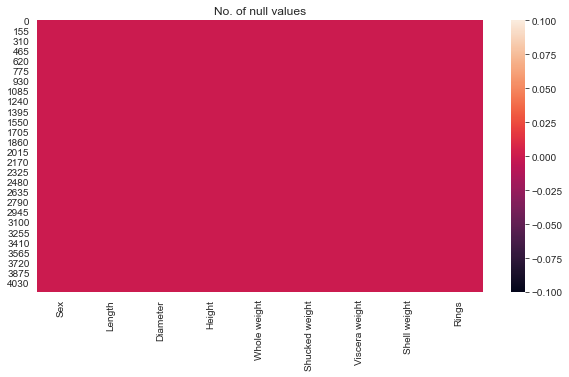

In [25]:
# Visualisation of null values
plt.figure(figsize=(10,5))
plt.title('No. of null values')
sns.heatmap(df.isnull())
plt.show()

No missing or null values in the dataset

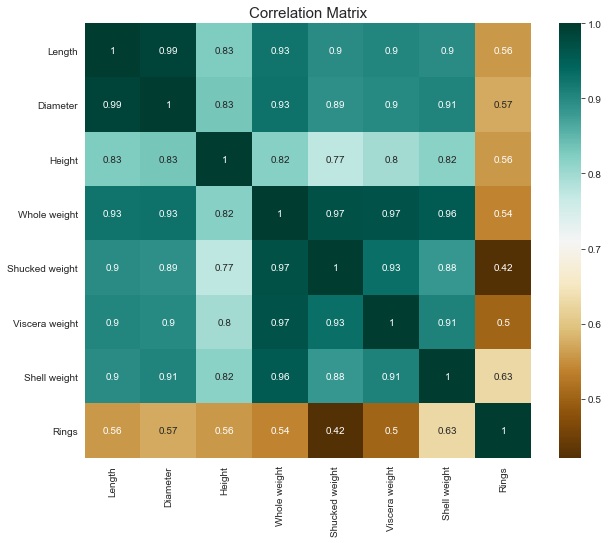

In [26]:
# Visualation of correlation 
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix',fontsize=15)
sns.heatmap(correlation,annot=True,cmap='BrBG')
plt.show()

The above plot represents corelation of all the variables with each other the dark green boxes represent higher corelation.

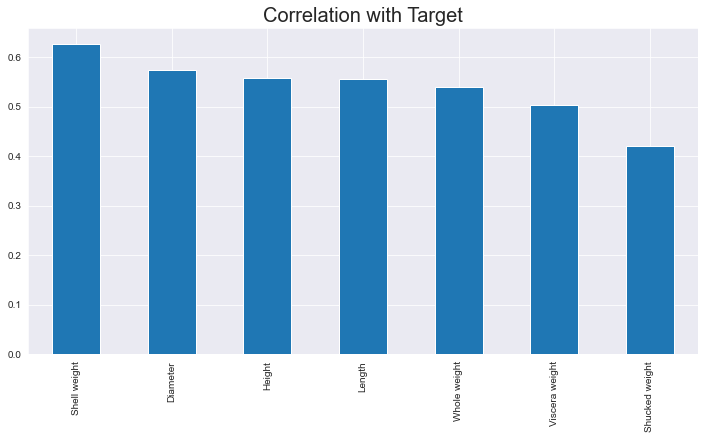

In [27]:
correlation['Rings'].sort_values(ascending=False).drop(['Rings']).plot.bar(figsize=(12,6)) 
plt.title("Correlation with Target",fontsize=20)
plt.show()

The above plot shows corelation of the features with target variables sorted from highest to lowest.

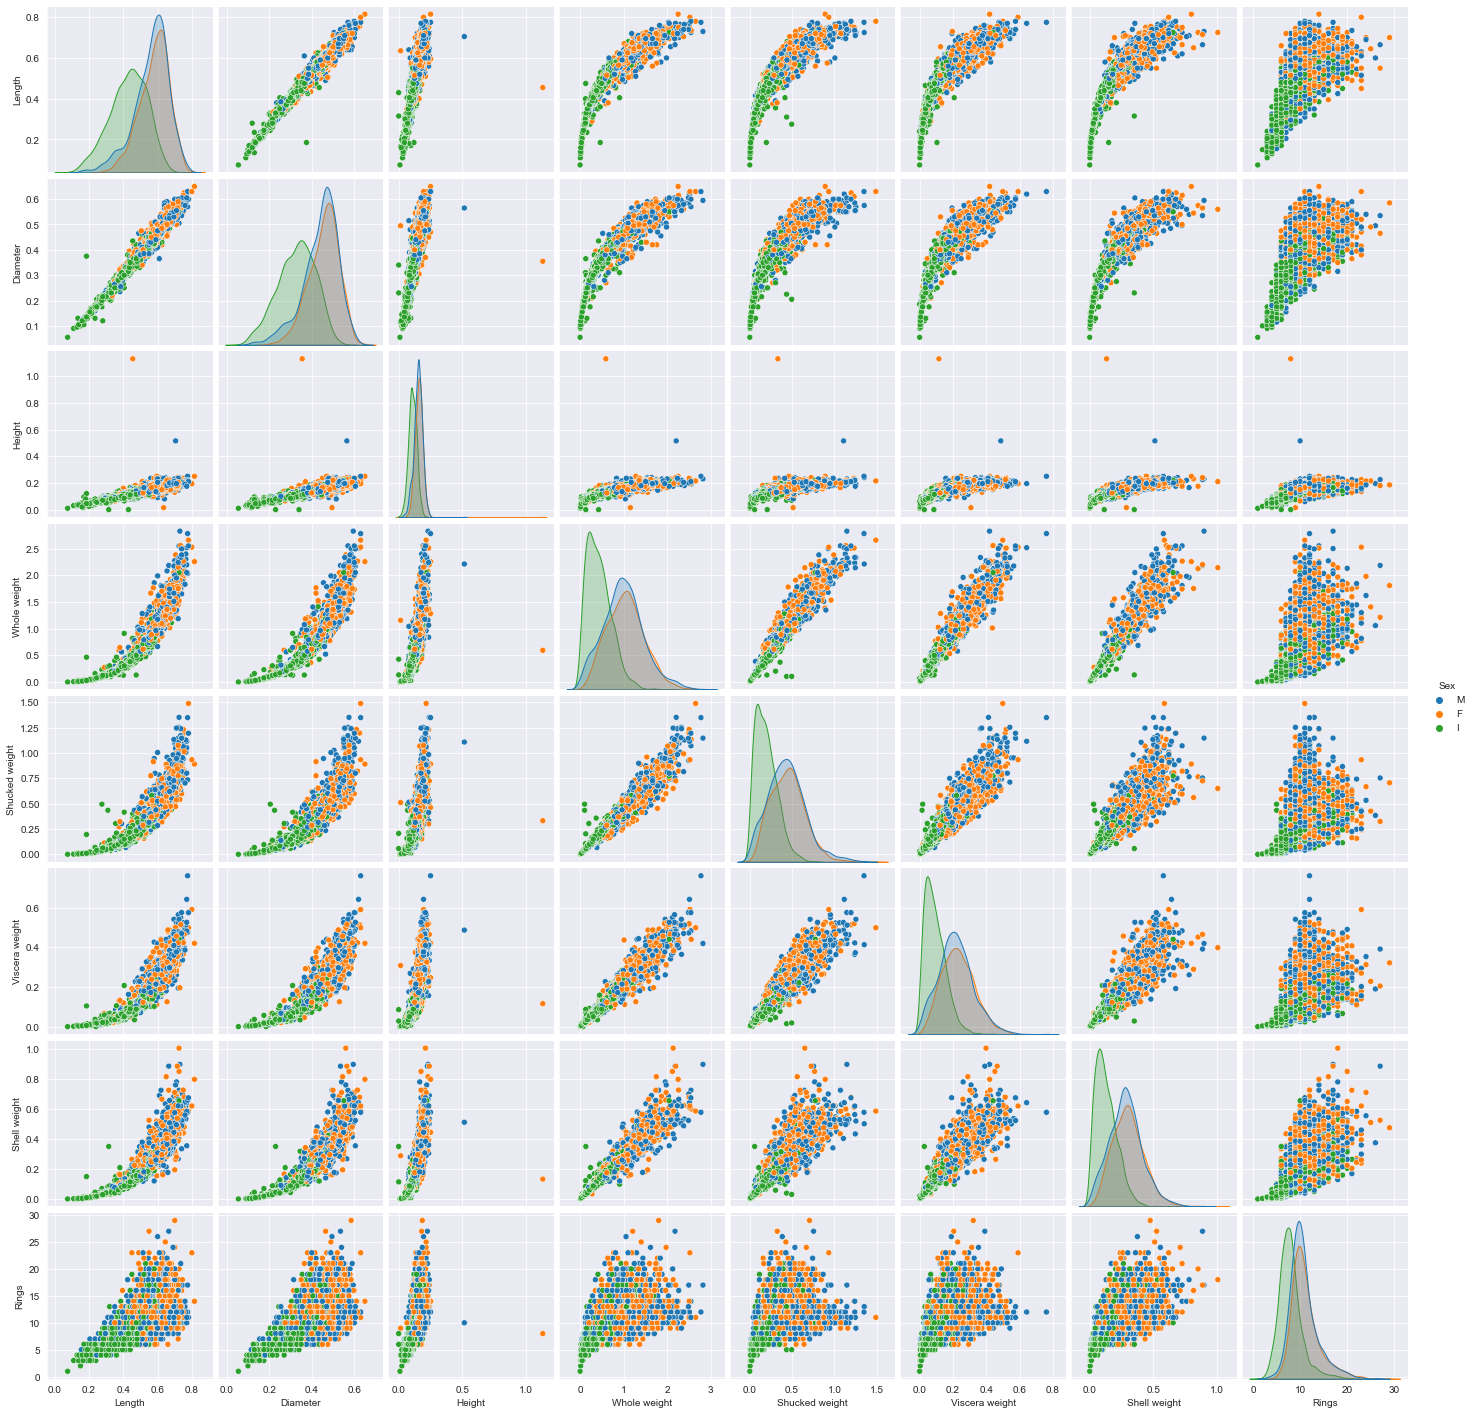

In [47]:
sns.pairplot(df,hue='Sex')

Observation : There is alot of overlapping of data and data is dense although some parts of the plot show that there is linear relation among the variables.

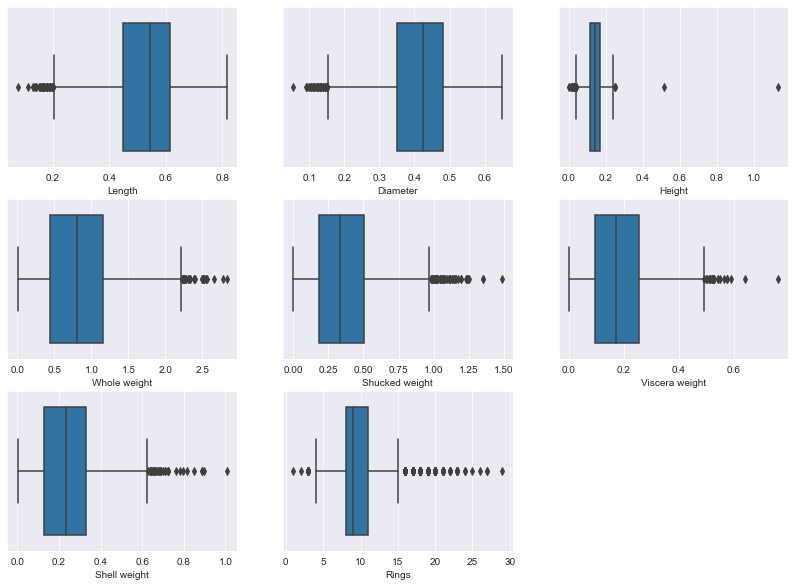

In [29]:
plot = 1
plt.figure(figsize=(14,10))
for i in cols:
    plt.subplot(3,3,plot)
    sns.boxplot(df[i])
    plot=plot+1
plt.show()

The above boxplots shows that all the variables have presence of outliers 

### Removal of outliers and skewness

In [30]:
df2 = df.select_dtypes(exclude='object')
df2.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [31]:
#outlier removal

In [32]:
from scipy.stats import zscore
z = np.abs(zscore(df2))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [33]:
df3 = df.loc[((z<3).all(axis=1))]
df3.shape

(4027, 9)

In [34]:
df.shape

(4177, 9)

In [35]:
#Treating skewness

In [36]:
#skewness of the dataset
df3.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

In [37]:
#removing skewness where skweness >=0.5 or <=-0.5
for i in df2:
    if df3[i].skew()>=0.5:
        df3[i]=np.sqrt(df3[i])
    if df3[i].skew()<=-0.5:
        df3[i]=np.power(df3[i],2)

In [38]:
#skewness after treatment
df3.skew()

Length           -0.119420
Diameter         -0.078925
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.247399
dtype: float64

### Label Encoding

In [39]:
#Since the gender column is categorical applying label encoding on it
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df3.Sex = LE.fit_transform(df3.Sex)
df3.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.207025,0.133225,0.095,0.5140,0.2245,0.1010,0.150,3.872983
1,2,0.122500,0.070225,0.090,0.2255,0.0995,0.0485,0.070,2.645751
2,0,0.280900,0.176400,0.135,0.6770,0.2565,0.1415,0.210,3.000000
3,2,0.193600,0.133225,0.125,0.5160,0.2155,0.1140,0.155,3.162278
4,1,0.108900,0.065025,0.080,0.2050,0.0895,0.0395,0.055,2.645751


### Splitting into Feature and Target variables

In [40]:
X = df3.drop(['Rings'],axis=1)
y = df3.Rings

In [41]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.207025,0.133225,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.122500,0.070225,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.280900,0.176400,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.193600,0.133225,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.108900,0.065025,0.080,0.2050,0.0895,0.0395,0.055


In [42]:
y.head()

0    3.872983
1    2.645751
2    3.000000
3    3.162278
4    2.645751
Name: Rings, dtype: float64

#### Finding best random state

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxacc=0
maxrs=0
for i in range(1,200):
    LR = LinearRegression()
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=i)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Best accuracy is : ", maxacc, " best random state : ", maxrs)

Best accuracy is :  0.5663462774614081  best random state :  82


In [45]:
#splitting into training and testing sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=82)

In [50]:
# feature selection for better accuracy of the model
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(xtrain, ytrain)
mutual_info

array([0.15621957, 0.3663389 , 0.35627981, 0.37156727, 0.36292523,
       0.33123122, 0.34226711, 0.41542184])

In [51]:
# selecting index of mutual info and sorting the features
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain.columns
mutual_info.sort_values(ascending=False)

Shell weight      0.415422
Height            0.371567
Length            0.366339
Whole weight      0.362925
Diameter          0.356280
Viscera weight    0.342267
Shucked weight    0.331231
Sex               0.156220
dtype: float64

<AxesSubplot:>

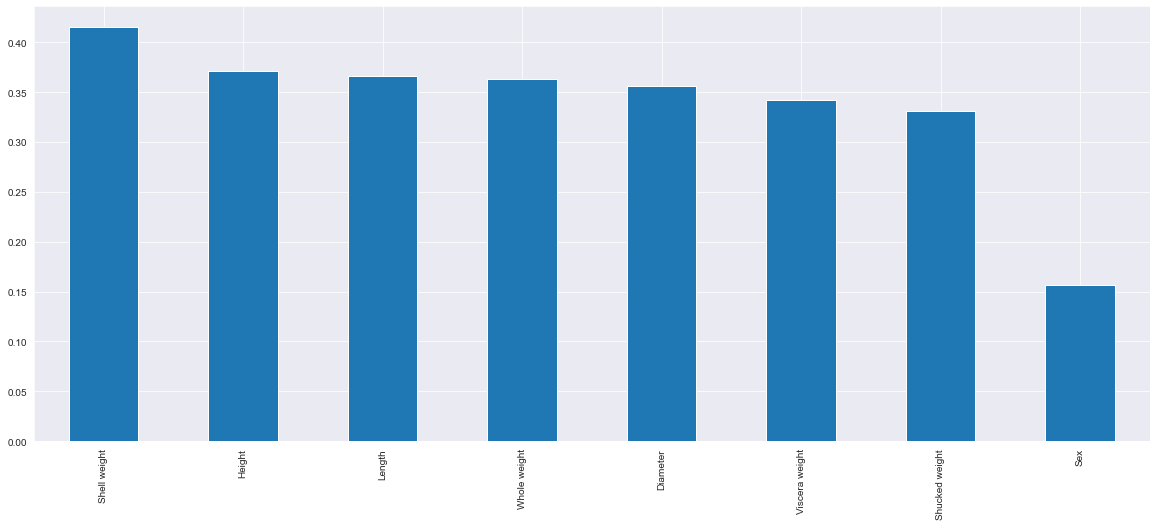

In [52]:
#plotting features as per their dependency
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [55]:
# slecting 5 best features
from sklearn.feature_selection import SelectKBest

sel_five_cols = SelectKBest(mutual_info_regression, k=5)
sel_five_cols.fit(xtrain, ytrain)
xtrain.columns[sel_five_cols.get_support()]

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shell weight'], dtype='object')

### Model building

In [56]:
#importing important modules for model building
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV

In [69]:
# intialising all the models
LR = LinearRegression()
KNN = KNeighborsRegressor()
SV = SVR()
DTR = DecisionTreeRegressor()
RTF = RandomForestRegressor()
ADB = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [74]:
# list of model name and instances
models = [("Linear Regression ",LR),
          ("K Nearest Neighbor Regressor ",KNN),
          ("Support Vector Regressor ",SV),
          ("Decision Tree Regressor ",DTR),
          ("Random forest Regressor ",RTF),
          ("AdaBoost Regressor ",ADB),
          ("Gradient Boosting Regressor ",GB)]

In [75]:
# loop for model training, prediction and evaluation
for name, model in models:
    print("*****",name,"*****")
    model.fit(xtrain,ytrain)
    print("\n",model)
    pred = model.predict(xtest)
    
    print('R2_score',r2_score(ytest,pred))
    print('Cross val score',cross_val_score(model,X,y,scoring="r2",cv=5).mean())
    print('MAE',mean_absolute_error(ytest,pred))
    print('MSE',mean_squared_error(ytest,pred))
    print('RMSE',np.sqrt(mean_squared_error(ytest,pred)),"\n")

***** Linear Regression  *****

 LinearRegression()
R2_score 0.5663462774614081
Cross val score 0.4520741420210749
MAE 0.23526653695945843
MSE 0.09387446448939082
RMSE 0.3063894000930692 

***** K Nearest Neighbor Regressor  *****

 KNeighborsRegressor()
R2_score 0.5669061919541456
Cross val score 0.4866910673796415
MAE 0.2307869601517544
MSE 0.09375325793578884
RMSE 0.30619153798854215 

***** Support Vector Regressor  *****

 SVR()
R2_score 0.6072533585345319
Cross val score 0.5345710455629107
MAE 0.21896925200731537
MSE 0.08501917251337916
RMSE 0.2915804734775276 

***** Decision Tree Regressor  *****

 DecisionTreeRegressor()
R2_score 0.23447253284406577
Cross val score 0.059324189758412006
MAE 0.30312925242730615
MSE 0.16571627844100367
RMSE 0.40708264325687443 

***** Random forest Regressor  *****

 RandomForestRegressor()
R2_score 0.6004934643974095
Cross val score 0.5105803512924061
MAE 0.22494228392870777
MSE 0.08648250929373127
RMSE 0.294079086801036 

***** AdaBoost Regress

Since Support Vector Regressor gives an r2_score of 60.72 and cross val score of 53.45 we will be taking it as our best models since it gives us the highest accuracy

### Hyperparameter Tuning

In [60]:
# hyperparameter tuning for best accuracy
GD = GridSearchCV(SVR(),
                 {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                 'gamma':['auto','scale'],
                 'C':[.0001,.001,.01,0.1,10],
                 'epsilon':[.0001,.001,.01,0.1]},
                 cv=5)
GD.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 10],
                         'epsilon': [0.0001, 0.001, 0.01, 0.1],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [61]:
# best parameters for optimal results
GD.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

### Final Model 

In [64]:
#building final model with best parameters 
final_model = SVR( kernel='rbf', C=10, epsilon=0.1, gamma='scale')
final_model.fit(xtrain,ytrain)
print("\n",final_model)
final_pred = final_model.predict(xtest)
print('R2_score : ',r2_score(ytest,final_pred))
print('MAE',mean_absolute_error(ytest,pred))
print('MSE',mean_squared_error(ytest,pred))
print('RMSE',np.sqrt(mean_squared_error(ytest,pred)))


 SVR(C=10)
R2_score :  0.6220096041323528
MAE 0.21571704917473825
MSE 0.08221277526552358
RMSE 0.28672770229875516


### Saving model 

In [67]:
import joblib
joblib.dump(final_model,'Abalone_FinalModel.pkl')

['Abalone_FinalModel.pkl']